In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
X = 2 * np.random.rand(100, 1)
y = 7 + 2 * X + np.random.rand(100, 1)

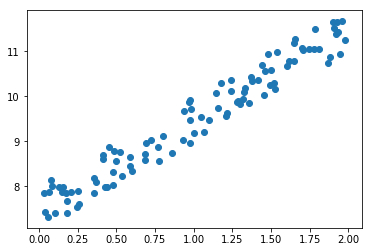

In [43]:
plt.scatter(X, y)

In [44]:
## Normal Equation

In [45]:
X_b = np.c_[np.ones(X.shape), X]
# theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# theta_best

$P_{r,c} = \sum_{k=1}^n{Q_{r,k} \times R_{k,c}}$

where;

$P$ = dot

$Q$ = X_b.T

$R$ = X_b

In [46]:
dot = np.zeros((X_b.T.shape[0], X_b.shape[1]))

for r in range(dot.shape[0]):
    for c in range(dot.shape[1]):
        sm = 0
        for k in range(X_b.shape[0]):
            sm += X_b.T[r,k] * X_b[k,c]
        dot[r, c] = sm


In [47]:
invd = np.linalg.inv(dot)

dot2 = np.zeros((invd.shape[0], X_b.T.shape[1]))

for r in range(dot2.shape[0]):
    for c in range(dot2.shape[1]):
        sm = 0
        for k in range(X_b.T.shape[0]):
            sm += invd[r,k] * X_b.T[k,c]
        dot2[r, c] = sm

theta_best = np.zeros((dot2.shape[0], y.shape[1]))

for r in range(theta_best.shape[0]):
    for c in range(theta_best.shape[1]):
        sm = 0
        for k in range(y.shape[0]):
            sm += dot2[r,k] * y[k,c]
        theta_best[r, c] = sm
        
theta_best

array([[ 7.42788844],
       [ 2.04758268]])

In [48]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

# y_pred = X_new_b @ theta_best

y_pred = np.zeros((X_new_b.shape[0], theta_best.shape[1]))

for r in range(y_pred.shape[0]):
    for c in range(y_pred.shape[1]):
        sm = 0
        for k in range(theta_best.shape[0]):
            sm += X_new_b[r,k] * theta_best[k,c]
        y_pred[r, c] = sm

y_pred

array([[  7.42788844],
       [ 11.52305379]])

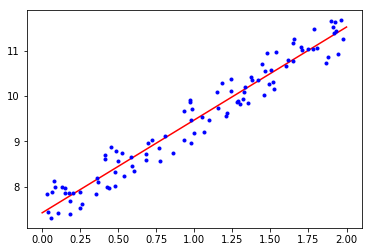

In [49]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

In [50]:
## Batch Gradient Descent

In [51]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [52]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iter):
    gradients = 2/m * X_b.T @ ((X_b @ theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 7.42788844],
       [ 2.04758268]])

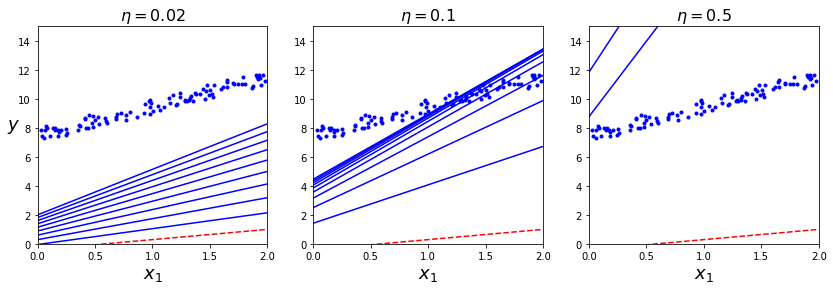

In [53]:
theta_path_bgd = []

np.random.seed(29)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(14,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [54]:
## Stochastic Gradient Descent

In [55]:
n_epoch = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        randi = np.random.randint(m)
        xi = X_b[randi:randi+1]
        yi = y[randi:randi+1]
        gradients = xi.T @ ((xi @ theta) - yi) # what is this calculation?
#         gradients = (xi @ theta) - yi
        print(f'grad: {gradients}')
        print(f'yi:   {yi}')
        print(f'pred: {xi @ theta}')
        print(f'diff: {yi - (xi @ theta)}\n')
        eta = learning_schedule(epoch * m + i)
        print(f'{theta} - {eta} * {gradients}\n')
        theta = theta - eta * gradients

theta

grad: [[-13.57887567]
 [-26.07070168]]
yi:   [[ 11.38280647]]
pred: [[-2.19606919]]
diff: [[ 13.57887567]]

[[ 1.9159847]
 [-2.1417555]] - 0.1 * [[-13.57887567]
 [-26.07070168]]

grad: [[-6.50658969]
 [-8.9167605 ]]
yi:   [[ 10.41813848]]
pred: [[ 3.91154879]]
diff: [[ 6.50658969]]

[[ 3.27387227]
 [ 0.46531467]] - 0.09803921568627451 * [[-6.50658969]
 [-8.9167605 ]]

grad: [[-4.67067828]
 [-6.40079082]]
yi:   [[ 10.41813848]]
pred: [[ 5.7474602]]
diff: [[ 4.67067828]]

[[ 3.91177322]
 [ 1.33950688]] - 0.09615384615384616 * [[-4.67067828]
 [-6.40079082]]

grad: [[-2.80970287]
 [-4.0915466 ]]
yi:   [[ 10.01744335]]
pred: [[ 7.20774048]]
diff: [[ 2.80970287]]

[[ 4.3608769 ]
 [ 1.95496753]] - 0.09433962264150944 * [[-2.80970287]
 [-4.0915466 ]]

grad: [[-2.90667219]
 [-3.42539259]]
yi:   [[ 10.29134258]]
pred: [[ 7.38467039]]
diff: [[ 2.90667219]]

[[ 4.62594321]
 [ 2.3409625 ]] - 0.09259259259259259 * [[-2.90667219]
 [-3.42539259]]

grad: [[-1.34445886]
 [-1.82221818]]
yi:   [[ 9.842244

 [ 0.19309197]]
yi:   [[ 9.47148827]]
pred: [[ 9.64716497]]
diff: [[-0.1756767]]

[[ 6.68024425]
 [ 2.69932934]] - 0.034013605442176874 * [[ 0.1756767 ]
 [ 0.19309197]]

grad: [[-0.04006462]
 [-0.04198875]]
yi:   [[ 9.53641687]]
pred: [[ 9.49635225]]
diff: [[ 0.04006462]]

[[ 6.67426885]
 [ 2.69276158]] - 0.033783783783783786 * [[-0.04006462]
 [-0.04198875]]

grad: [[ 0.03601619]
 [ 0.04959252]]
yi:   [[ 10.34936034]]
pred: [[ 10.38537653]]
diff: [[-0.03601619]]

[[ 6.67562239]
 [ 2.69418012]] - 0.03355704697986577 * [[ 0.03601619]
 [ 0.04959252]]

grad: [[ 0.25158299]
 [ 0.32210647]]
yi:   [[ 9.87011]]
pred: [[ 10.12169299]]
diff: [[-0.25158299]]

[[ 6.67441379]
 [ 2.69251594]] - 0.03333333333333333 * [[ 0.25158299]
 [ 0.32210647]]

grad: [[-0.05981575]
 [-0.06268844]]
yi:   [[ 9.53641687]]
pred: [[ 9.47660112]]
diff: [[ 0.05981575]]

[[ 6.66602769]
 [ 2.68177906]] - 0.033112582781456956 * [[-0.05981575]
 [-0.06268844]]

grad: [[-0.55068722]
 [-0.13818027]]
yi:   [[ 7.89213733]]
pred:

yi:   [[ 10.01744335]]
pred: [[ 10.50226705]]
diff: [[-0.48482371]]

[[ 6.92524862]
 [ 2.45637162]] - 0.017985611510791366 * [[ 0.48482371]
 [ 0.70601017]]

grad: [[ 0.19612279]
 [ 0.25887826]]
yi:   [[ 9.94600753]]
pred: [[ 10.14213031]]
diff: [[-0.19612279]]

[[ 6.91652877]
 [ 2.44367359]] - 0.017921146953405017 * [[ 0.19612279]
 [ 0.25887826]]

grad: [[-0.40617003]
 [-0.145685  ]]
yi:   [[ 8.19401646]]
pred: [[ 7.78784643]]
diff: [[ 0.40617003]]

[[ 6.91301403]
 [ 2.4390342 ]] - 0.017857142857142856 * [[-0.40617003]
 [-0.145685  ]]

grad: [[-0.3426227 ]
 [-0.23757681]]
yi:   [[ 8.95593585]]
pred: [[ 8.61331315]]
diff: [[ 0.3426227]]

[[ 6.92026706]
 [ 2.44163572]] - 0.017793594306049824 * [[-0.3426227 ]
 [-0.23757681]]

grad: [[-0.14694792]
 [-0.14379668]]
yi:   [[ 9.46672391]]
pred: [[ 9.31977599]]
diff: [[ 0.14694792]]

[[ 6.92636355]
 [ 2.44586306]] - 0.01773049645390071 * [[-0.14694792]
 [-0.14379668]]

grad: [[-0.87154093]
 [-0.07229528]]
yi:   [[ 8.00360847]]
pred: [[ 7.132067

yi:   [[ 10.70076413]]
pred: [[ 10.43087036]]
diff: [[ 0.26989377]]

[[ 7.01018053]
 [ 2.37055703]] - 0.012953367875647668 * [[-0.26989377]
 [-0.38945398]]

grad: [[-0.44426785]
 [-0.41519154]]
yi:   [[ 9.67806851]]
pred: [[ 9.23380065]]
diff: [[ 0.44426785]]

[[ 7.01367657]
 [ 2.37560177]] - 0.012919896640826873 * [[-0.44426785]
 [-0.41519154]]

grad: [[ 0.28702797]
 [ 0.34919337]]
yi:   [[ 9.62903143]]
pred: [[ 9.9160594]]
diff: [[-0.28702797]]

[[ 7.01941646]
 [ 2.380966  ]] - 0.01288659793814433 * [[ 0.28702797]
 [ 0.34919337]]

grad: [[ 0.48848378]
 [ 0.74501316]]
yi:   [[ 10.15171149]]
pred: [[ 10.64019527]]
diff: [[-0.48848378]]

[[ 7.01571765]
 [ 2.37646609]] - 0.012853470437017995 * [[ 0.48848378]
 [ 0.74501316]]

grad: [[-0.14297689]
 [-0.27177532]]
yi:   [[ 11.65148079]]
pred: [[ 11.50850391]]
diff: [[ 0.14297689]]

[[ 7.00943894]
 [ 2.36689008]] - 0.01282051282051282 * [[-0.14297689]
 [-0.27177532]]

grad: [[ 0.07900423]
 [ 0.03490972]]
yi:   [[ 7.97966865]]
pred: [[ 8.0586

 [-0.5363887 ]]
yi:   [[ 11.26993802]]
pred: [[ 10.94540063]]
diff: [[ 0.32453739]]

[[ 7.07368641]
 [ 2.34254753]] - 0.01098901098901099 * [[-0.32453739]
 [-0.5363887 ]]

grad: [[ 0.33168216]
 [ 0.2564863 ]]
yi:   [[ 8.56159586]]
pred: [[ 8.89327802]]
diff: [[-0.33168216]]

[[ 7.07725276]
 [ 2.34844192]] - 0.010964912280701754 * [[ 0.33168216]
 [ 0.2564863 ]]

grad: [[ 0.18028541]
 [ 0.19815756]]
yi:   [[ 9.47148827]]
pred: [[ 9.65177368]]
diff: [[-0.18028541]]

[[ 7.07361589]
 [ 2.34562957]] - 0.010940919037199124 * [[ 0.18028541]
 [ 0.19815756]]

grad: [[-0.45802697]
 [-0.53976578]]
yi:   [[ 10.29134258]]
pred: [[ 9.83331561]]
diff: [[ 0.45802697]]

[[ 7.07164341]
 [ 2.34346154]] - 0.010917030567685589 * [[-0.45802697]
 [-0.53976578]]

grad: [[ 0.12166642]
 [ 0.02989598]]
yi:   [[ 7.5322626]]
pred: [[ 7.65392901]]
diff: [[-0.12166642]]

[[ 7.0766437 ]
 [ 2.34935418]] - 0.010893246187363835 * [[ 0.12166642]
 [ 0.02989598]]

grad: [[-0.30930352]
 [-0.06358654]]
yi:   [[ 7.86753455]]
p

[[ 7.12984983]
 [ 2.32921302]] - 0.009416195856873822 * [[ 0.1349043 ]
 [ 0.05740335]]

grad: [[ 0.19862572]
 [ 0.3840073 ]]
yi:   [[ 11.43202567]]
pred: [[ 11.63065138]]
diff: [[-0.19862572]]

[[ 7.12857955]
 [ 2.3286725 ]] - 0.009398496240601503 * [[ 0.19862572]
 [ 0.3840073 ]]

grad: [[-0.52612672]
 [-0.21620946]]
yi:   [[ 8.60831406]]
pred: [[ 8.08218734]]
diff: [[ 0.52612672]]

[[ 7.12671276]
 [ 2.32506341]] - 0.009380863039399626 * [[-0.52612672]
 [-0.21620946]]

grad: [[ 0.43452787]
 [ 0.42404531]]
yi:   [[ 8.96807323]]
pred: [[ 9.40260109]]
diff: [[-0.43452787]]

[[ 7.13164828]
 [ 2.32709164]] - 0.009363295880149813 * [[ 0.43452787]
 [ 0.42404531]]

grad: [[-0.61219691]
 [-0.25198184]]
yi:   [[ 8.6959793]]
pred: [[ 8.08378239]]
diff: [[ 0.61219691]]

[[ 7.12757967]
 [ 2.32312118]] - 0.009345794392523364 * [[-0.61219691]
 [-0.25198184]]

grad: [[ 0.35534017]
 [ 0.53872393]]
yi:   [[ 10.30356763]]
pred: [[ 10.6589078]]
diff: [[-0.35534017]]

[[ 7.13330114]
 [ 2.32547615]] - 0.009


[[ 7.15996097]
 [ 2.27995741]] - 0.00792393026941363 * [[ 0.22581595]
 [ 0.40814016]]

grad: [[-0.04894652]
 [-0.09600041]]
yi:   [[ 11.67253059]]
pred: [[ 11.62358407]]
diff: [[ 0.04894652]]

[[ 7.15817162]
 [ 2.27672334]] - 0.007911392405063292 * [[-0.04894652]
 [-0.09600041]]

grad: [[ 0.37600302]
 [ 0.32407688]]
yi:   [[ 8.74551757]]
pred: [[ 9.12152059]]
diff: [[-0.37600302]]

[[ 7.15855885]
 [ 2.27748283]] - 0.007898894154818325 * [[ 0.37600302]
 [ 0.32407688]]

grad: [[ 0.33241246]
 [ 0.40099894]]
yi:   [[ 9.567483]]
pred: [[ 9.89989546]]
diff: [[-0.33241246]]

[[ 7.15558885]
 [ 2.27492299]] - 0.007886435331230283 * [[ 0.33241246]
 [ 0.40099894]]

grad: [[-0.31068634]
 [-0.05468194]]
yi:   [[ 7.86349185]]
pred: [[ 7.5528055]]
diff: [[ 0.31068634]]

[[ 7.1529673 ]
 [ 2.27176053]] - 0.007874015748031496 * [[-0.31068634]
 [-0.05468194]]

grad: [[ 0.29069145]
 [ 0.3536503 ]]
yi:   [[ 9.62903143]]
pred: [[ 9.91972288]]
diff: [[-0.29069145]]

[[ 7.15541365]
 [ 2.2721911 ]] - 0.007861


[[ 7.18755557]
 [ 2.247391  ]] - 0.006648936170212766 * [[ 0.23894518]
 [ 0.11459954]]

grad: [[-0.59912838]
 [-0.01793664]]
yi:   [[ 7.85235457]]
pred: [[ 7.25322619]]
diff: [[ 0.59912838]]

[[ 7.18596684]
 [ 2.24662903]] - 0.006640106241699867 * [[-0.59912838]
 [-0.01793664]]

grad: [[-0.44267336]
 [-0.06781566]]
yi:   [[ 7.97681064]]
pred: [[ 7.53413728]]
diff: [[ 0.44267336]]

[[ 7.18994512]
 [ 2.24674814]] - 0.006631299734748011 * [[-0.44267336]
 [-0.06781566]]

grad: [[ 0.2601398]
 [ 0.2602906]]
yi:   [[ 9.18124136]]
pred: [[ 9.44138116]]
diff: [[-0.2601398]]

[[ 7.19288062]
 [ 2.24719784]] - 0.006622516556291391 * [[ 0.2601398]
 [ 0.2602906]]

grad: [[-0.5090585 ]
 [-0.24696232]]
yi:   [[ 8.78957539]]
pred: [[ 8.28051689]]
diff: [[ 0.5090585]]

[[ 7.19115784]
 [ 2.24547406]] - 0.006613756613756613 * [[-0.5090585 ]
 [-0.24696232]]

grad: [[-0.38584073]
 [-0.47887193]]
yi:   [[ 10.3692795]]
pred: [[ 9.98343877]]
diff: [[ 0.38584073]]

[[ 7.19452463]
 [ 2.24710741]] - 0.0066050198

pred: [[ 7.9836215]]
diff: [[-0.13230371]]

[[ 7.19710102]
 [ 2.22414884]] - 0.006016847172081829 * [[ 0.13230371]
 [ 0.04678625]]

grad: [[ 0.02748853]
 [ 0.03173906]]
yi:   [[ 9.73655849]]
pred: [[ 9.76404703]]
diff: [[-0.02748853]]

[[ 7.19630497]
 [ 2.22386734]] - 0.006009615384615385 * [[ 0.02748853]
 [ 0.03173906]]

grad: [[-0.02002111]
 [-0.02833647]]
yi:   [[ 10.36339634]]
pred: [[ 10.34337523]]
diff: [[ 0.02002111]]

[[ 7.19613978]
 [ 2.2236766 ]] - 0.006002400960384154 * [[-0.02002111]
 [-0.02833647]]

grad: [[ 0.43625793]
 [ 0.66536069]]
yi:   [[ 10.15171149]]
pred: [[ 10.58796942]]
diff: [[-0.43625793]]

[[ 7.19625995]
 [ 2.22384668]] - 0.005995203836930456 * [[ 0.43625793]
 [ 0.66536069]]

grad: [[-0.15873151]
 [-0.00595744]]
yi:   [[ 7.43569066]]
pred: [[ 7.27695915]]
diff: [[ 0.15873151]]

[[ 7.1936445 ]
 [ 2.21985771]] - 0.005988023952095809 * [[-0.15873151]
 [-0.00595744]]

grad: [[ 0.05433619]
 [ 0.1050493 ]]
yi:   [[ 11.43202567]]
pred: [[ 11.48636186]]
diff: [[-0.05

 [-0.21944801]]
yi:   [[ 8.6959793]]
pred: [[ 8.16282423]]
diff: [[ 0.53315507]]

[[ 7.24948204]
 [ 2.21899032]] - 0.005307855626326964 * [[-0.53315507]
 [-0.21944801]]

grad: [[-0.0398429 ]
 [-0.01459719]]
yi:   [[ 8.10554995]]
pred: [[ 8.06570705]]
diff: [[ 0.0398429]]

[[ 7.25231195]
 [ 2.22015512]] - 0.005302226935312832 * [[-0.0398429 ]
 [-0.01459719]]

grad: [[-0.08250601]
 [-0.02070268]]
yi:   [[ 7.89213733]]
pred: [[ 7.80963132]]
diff: [[ 0.08250601]]

[[ 7.25252321]
 [ 2.22023252]] - 0.005296610169491525 * [[-0.08250601]
 [-0.02070268]]

grad: [[-0.53292199]
 [-0.01595456]]
yi:   [[ 7.85235457]]
pred: [[ 7.31943258]]
diff: [[ 0.53292199]]

[[ 7.25296021]
 [ 2.22034217]] - 0.005291005291005291 * [[-0.53292199]
 [-0.01595456]]

grad: [[ 0.45456763]
 [ 0.44360162]]
yi:   [[ 8.96807323]]
pred: [[ 9.42264085]]
diff: [[-0.45456763]]

[[ 7.2557799 ]
 [ 2.22042658]] - 0.005285412262156448 * [[ 0.45456763]
 [ 0.44360162]]

grad: [[-0.36301188]
 [-0.45053875]]
yi:   [[ 10.3692795]]
pred

yi:   [[ 11.26993802]]
pred: [[ 10.89045451]]
diff: [[ 0.37948352]]

[[ 7.25710764]
 [ 2.19832541]] - 0.004849660523763337 * [[-0.37948352]
 [-0.62720253]]

grad: [[-0.44472391]
 [-0.18275734]]
yi:   [[ 8.60831406]]
pred: [[ 8.16359015]]
diff: [[ 0.44472391]]

[[ 7.25894801]
 [ 2.20136713]] - 0.0048449612403100775 * [[-0.44472391]
 [-0.18275734]]

grad: [[-0.44039104]
 [-0.0582625 ]]
yi:   [[ 7.99284556]]
pred: [[ 7.55245452]]
diff: [[ 0.44039104]]

[[ 7.26110268]
 [ 2.20225258]] - 0.00484027105517909 * [[-0.44039104]
 [-0.0582625 ]]

grad: [[ 0.53167662]
 [ 0.99826237]]
yi:   [[ 10.86698003]]
pred: [[ 11.39865665]]
diff: [[-0.53167662]]

[[ 7.26323429]
 [ 2.20253458]] - 0.004835589941972921 * [[ 0.53167662]
 [ 0.99826237]]

grad: [[ 0.09733535]
 [ 0.18687857]]
yi:   [[ 11.38280647]]
pred: [[ 11.48014182]]
diff: [[-0.09733535]]

[[ 7.26066332]
 [ 2.1977074 ]] - 0.004830917874396135 * [[ 0.09733535]
 [ 0.18687857]]

grad: [[ 0.05245393]
 [ 0.09162173]]
yi:   [[ 11.04491648]]
pred: [[ 11

yi:   [[ 9.47148827]]
pred: [[ 9.70988835]]
diff: [[-0.23840008]]

[[ 7.28384651]
 [ 2.2072332 ]] - 0.004420866489832007 * [[ 0.23840008]
 [ 0.26203329]]

grad: [[-0.31543199]
 [-0.16528996]]
yi:   [[ 8.75423294]]
pred: [[ 8.43880094]]
diff: [[ 0.31543199]]

[[ 7.28279258]
 [ 2.20607479]] - 0.00441696113074205 * [[-0.31543199]
 [-0.16528996]]

grad: [[-0.23218119]
 [-0.33503511]]
yi:   [[ 10.70076413]]
pred: [[ 10.46858294]]
diff: [[ 0.23218119]]

[[ 7.28418583]
 [ 2.20680487]] - 0.00441306266548985 * [[-0.23218119]
 [-0.33503511]]

grad: [[ 0.03399445]
 [ 0.05802131]]
yi:   [[ 11.02028664]]
pred: [[ 11.05428109]]
diff: [[-0.03399445]]

[[ 7.28521046]
 [ 2.2082834 ]] - 0.004409171075837742 * [[ 0.03399445]
 [ 0.05802131]]

grad: [[ 0.03340792]
 [ 0.05702023]]
yi:   [[ 11.02028664]]
pred: [[ 11.05369456]]
diff: [[-0.03340792]]

[[ 7.28506057]
 [ 2.20802757]] - 0.004405286343612335 * [[ 0.03340792]
 [ 0.05702023]]

grad: [[ 0.00854256]
 [ 0.00155657]]
yi:   [[ 7.67865895]]
pred: [[ 7.687

 [-0.1003645 ]]
yi:   [[ 8.56148509]]
pred: [[ 8.36051264]]
diff: [[ 0.20097245]]

[[ 7.27410951]
 [ 2.17544147]] - 0.004061738424045491 * [[-0.20097245]
 [-0.1003645 ]]

grad: [[-0.45226884]
 [-0.53298007]]
yi:   [[ 10.29134258]]
pred: [[ 9.83907374]]
diff: [[ 0.45226884]]

[[ 7.27492581]
 [ 2.17584913]] - 0.004058441558441558 * [[-0.45226884]
 [-0.53298007]]

grad: [[ 0.2646519 ]
 [ 0.39454679]]
yi:   [[ 10.25912075]]
pred: [[ 10.52377265]]
diff: [[-0.2646519]]

[[ 7.27676132]
 [ 2.1780122 ]] - 0.0040551500405515 * [[ 0.2646519 ]
 [ 0.39454679]]

grad: [[-0.39241792]
 [-0.48703497]]
yi:   [[ 10.3692795]]
pred: [[ 9.97686157]]
diff: [[ 0.39241792]]

[[ 7.27568811]
 [ 2.17641225]] - 0.004051863857374392 * [[-0.39241792]
 [-0.48703497]]

grad: [[ 0.38751822]
 [ 0.52522451]]
yi:   [[ 9.84224441]]
pred: [[ 10.22976263]]
diff: [[-0.38751822]]

[[ 7.27727814]
 [ 2.17838565]] - 0.004048582995951417 * [[ 0.38751822]
 [ 0.52522451]]

grad: [[ 0.57395979]
 [ 1.11595869]]
yi:   [[ 10.93308318]]


grad: [[ 0.30397103]
 [ 0.36668921]]
yi:   [[ 9.567483]]
pred: [[ 9.87145403]]
diff: [[-0.30397103]]

[[ 7.27462775]
 [ 2.15266755]] - 0.003756574004507889 * [[ 0.30397103]
 [ 0.36668921]]

grad: [[ 0.1671393 ]
 [ 0.22062062]]
yi:   [[ 9.94600753]]
pred: [[ 10.11314683]]
diff: [[-0.1671393]]

[[ 7.27348586]
 [ 2.15129006]] - 0.0037537537537537537 * [[ 0.1671393 ]
 [ 0.22062062]]

grad: [[ 0.25315856]
 [ 0.045873  ]]
yi:   [[ 7.40936932]]
pred: [[ 7.66252787]]
diff: [[-0.25315856]]

[[ 7.27285846]
 [ 2.1504619 ]] - 0.0037509377344336083 * [[ 0.25315856]
 [ 0.045873  ]]

grad: [[-0.05628691]
 [-0.07496579]]
yi:   [[ 10.19206183]]
pred: [[ 10.13577492]]
diff: [[ 0.05628691]]

[[ 7.27190888]
 [ 2.15028984]] - 0.0037481259370314842 * [[-0.05628691]
 [-0.07496579]]

grad: [[-0.07759927]
 [-0.13244547]]
yi:   [[ 11.02028664]]
pred: [[ 10.94268736]]
diff: [[ 0.07759927]]

[[ 7.27211985]
 [ 2.15057082]] - 0.003745318352059925 * [[-0.07759927]
 [-0.13244547]]

grad: [[ 0.16522981]
 [ 0.18160946]


grad: [[ 0.44611021]
 [ 0.83760507]]
yi:   [[ 10.86698003]]
pred: [[ 11.31309023]]
diff: [[-0.44611021]]

[[ 7.27740413]
 [ 2.14941484]] - 0.0034940600978336828 * [[ 0.44611021]
 [ 0.83760507]]

grad: [[-0.39621763]
 [-0.3702861 ]]
yi:   [[ 9.67806851]]
pred: [[ 9.28185087]]
diff: [[ 0.39621763]]

[[ 7.2758454]
 [ 2.1464882]] - 0.0034916201117318434 * [[-0.39621763]
 [-0.3702861 ]]

grad: [[ 0.40512358]
 [ 0.39535037]]
yi:   [[ 8.96807323]]
pred: [[ 9.3731968]]
diff: [[-0.40512358]]

[[ 7.27722884]
 [ 2.1477811 ]] - 0.0034891835310537334 * [[ 0.40512358]
 [ 0.39535037]]

grad: [[-0.47101478]
 [-0.03005098]]
yi:   [[ 7.88377158]]
pred: [[ 7.4127568]]
diff: [[ 0.47101478]]

[[ 7.27581529]
 [ 2.14640165]] - 0.003486750348675035 * [[-0.47101478]
 [-0.03005098]]

grad: [[-0.55048636]
 [-0.53652483]]
yi:   [[ 9.92001032]]
pred: [[ 9.36952395]]
diff: [[ 0.55048636]]

[[ 7.2774576 ]
 [ 2.14650643]] - 0.003484320557491289 * [[-0.55048636]
 [-0.53652483]]

grad: [[-0.37723596]
 [-0.67307914]]
y

[[ 7.30143189]
 [ 2.16080663]] - 0.0032679738562091504 * [[ 0.19784358]
 [ 0.25330288]]

grad: [[-0.08242105]
 [-0.06632125]]
yi:   [[ 9.12126353]]
pred: [[ 9.03884249]]
diff: [[ 0.08242105]]

[[ 7.30078534]
 [ 2.15997884]] - 0.0032658393207054214 * [[-0.08242105]
 [-0.06632125]]

grad: [[ 0.20646289]
 [ 0.27252699]]
yi:   [[ 9.94600753]]
pred: [[ 10.15247041]]
diff: [[-0.20646289]]

[[ 7.30105452]
 [ 2.16019544]] - 0.0032637075718015664 * [[ 0.20646289]
 [ 0.27252699]]

grad: [[-0.08336713]
 [-0.06708252]]
yi:   [[ 9.12126353]]
pred: [[ 9.0378964]]
diff: [[ 0.08336713]]

[[ 7.30038068]
 [ 2.15930599]] - 0.0032615786040443573 * [[-0.08336713]
 [-0.06708252]]

grad: [[ 0.21300242]
 [ 0.07532354]]
yi:   [[ 7.85131779]]
pred: [[ 8.06432021]]
diff: [[-0.21300242]]

[[ 7.30065259]
 [ 2.15952478]] - 0.003259452411994785 * [[ 0.21300242]
 [ 0.07532354]]

grad: [[-0.45324294]
 [-0.66962277]]
yi:   [[ 10.94332831]]
pred: [[ 10.49008537]]
diff: [[ 0.45324294]]

[[ 7.29995832]
 [ 2.15927927]] - 0


[[ 7.29222875]
 [ 2.14192031]] - 0.003067484662576687 * [[ 0.0217926]
 [ 0.0418406]]

grad: [[-0.13363696]
 [-0.04793288]]
yi:   [[ 8.19401646]]
pred: [[ 8.0603795]]
diff: [[ 0.13363696]]

[[ 7.2921619 ]
 [ 2.14179196]] - 0.0030656039239730227 * [[-0.13363696]
 [-0.04793288]]

grad: [[ 0.19870255]
 [ 0.07026671]]
yi:   [[ 7.85131779]]
pred: [[ 8.05002034]]
diff: [[-0.19870255]]

[[ 7.29257158]
 [ 2.1419389 ]] - 0.0030637254901960784 * [[ 0.19870255]
 [ 0.07026671]]

grad: [[-0.07896595]
 [-0.07727255]]
yi:   [[ 9.46672391]]
pred: [[ 9.38775796]]
diff: [[ 0.07896595]]

[[ 7.29196281]
 [ 2.14172363]] - 0.003061849357011635 * [[-0.07896595]
 [-0.07727255]]

grad: [[ 0.23601889]
 [ 0.35782339]]
yi:   [[ 10.30356763]]
pred: [[ 10.53958652]]
diff: [[-0.23601889]]

[[ 7.29220459]
 [ 2.14196022]] - 0.0030599755201958386 * [[ 0.23601889]
 [ 0.35782339]]

grad: [[-0.38583556]
 [-0.36058351]]
yi:   [[ 9.67806851]]
pred: [[ 9.29223295]]
diff: [[ 0.38583556]]

[[ 7.29148238]
 [ 2.14086529]] - 0.00

diff: [[ 0.34444822]]

[[ 7.29846849]
 [ 2.14560631]] - 0.002890173410404624 * [[-0.34444822]
 [-0.56722023]]

grad: [[-0.05499046]
 [-0.08262013]]
yi:   [[ 10.58057252]]
pred: [[ 10.52558206]]
diff: [[ 0.05499046]]

[[ 7.299464  ]
 [ 2.14724567]] - 0.0028885037550548816 * [[-0.05499046]
 [-0.08262013]]

grad: [[ 0.40938995]
 [ 0.59616199]]
yi:   [[ 10.01744335]]
pred: [[ 10.42683329]]
diff: [[-0.40938995]]

[[ 7.29962284]
 [ 2.14748432]] - 0.002886836027713626 * [[ 0.40938995]
 [ 0.59616199]]

grad: [[-0.66842755]
 [-0.05165767]]
yi:   [[ 8.13269825]]
pred: [[ 7.4642707]]
diff: [[ 0.66842755]]

[[ 7.298441 ]
 [ 2.1457633]] - 0.0028851702250432777 * [[-0.66842755]
 [-0.05165767]]

grad: [[-0.49314049]
 [-0.47851472]]
yi:   [[ 9.87577798]]
pred: [[ 9.3826375]]
diff: [[ 0.49314049]]

[[ 7.30036953]
 [ 2.14591234]] - 0.0028835063437139563 * [[-0.49314049]
 [-0.47851472]]

grad: [[-0.02144495]
 [-0.03462952]]
yi:   [[ 10.79070493]]
pred: [[ 10.76925998]]
diff: [[ 0.02144495]]

[[ 7.3017915


grad: [[-0.04890931]
 [-0.01227249]]
yi:   [[ 7.89213733]]
pred: [[ 7.84322803]]
diff: [[ 0.04890931]]

[[ 7.30471006]
 [ 2.14614557]] - 0.0027262813522355507 * [[-0.04890931]
 [-0.01227249]]

grad: [[-0.11555867]
 [-0.19665852]]
yi:   [[ 11.072784]]
pred: [[ 10.95722534]]
diff: [[ 0.11555867]]

[[ 7.3048434 ]
 [ 2.14617903]] - 0.0027247956403269754 * [[-0.11555867]
 [-0.19665852]]

grad: [[-0.0836463 ]
 [-0.04904842]]
yi:   [[ 8.64759271]]
pred: [[ 8.56394641]]
diff: [[ 0.0836463]]

[[ 7.30515827]
 [ 2.14671488]] - 0.0027233115468409588 * [[-0.0836463 ]
 [-0.04904842]]

grad: [[-0.02739313]
 [-0.03648358]]
yi:   [[ 10.19206183]]
pred: [[ 10.16466869]]
diff: [[ 0.02739313]]

[[ 7.30538606]
 [ 2.14684846]] - 0.0027218290691344584 * [[-0.02739313]
 [-0.03648358]]

grad: [[-0.08765776]
 [-0.12070044]]
yi:   [[ 10.34936034]]
pred: [[ 10.26170259]]
diff: [[ 0.08765776]]

[[ 7.30546062]
 [ 2.14694776]] - 0.002720348204570185 * [[-0.08765776]
 [-0.12070044]]

grad: [[ 0.42891511]
 [ 0.654161

pred: [[ 10.40261817]]
diff: [[ 0.29814596]]

[[ 7.30842323]
 [ 2.14429426]] - 0.0025906735751295338 * [[-0.29814596]
 [-0.43022161]]

grad: [[ 0.31167397]
 [ 0.1494807 ]]
yi:   [[ 8.02647257]]
pred: [[ 8.33814655]]
diff: [[-0.31167397]]

[[ 7.30919563]
 [ 2.14540883]] - 0.002589331952356292 * [[ 0.31167397]
 [ 0.1494807 ]]

grad: [[-0.2971308 ]
 [-0.42875674]]
yi:   [[ 10.70076413]]
pred: [[ 10.40363333]]
diff: [[ 0.2971308]]

[[ 7.3083886 ]
 [ 2.14502177]] - 0.002587991718426501 * [[-0.2971308 ]
 [-0.42875674]]

grad: [[ 0.08653207]
 [ 0.15394018]]
yi:   [[ 11.04058389]]
pred: [[ 11.12711596]]
diff: [[-0.08653207]]

[[ 7.30915757]
 [ 2.14613139]] - 0.002586652871184687 * [[ 0.08653207]
 [ 0.15394018]]

grad: [[-0.1395851 ]
 [-0.17337469]]
yi:   [[ 10.11367324]]
pred: [[ 9.97408814]]
diff: [[ 0.1395851]]

[[ 7.30893374]
 [ 2.1457332 ]] - 0.0025853154084798345 * [[-0.1395851 ]
 [-0.17337469]]

grad: [[ 0.18782105]
 [ 0.12852912]]
yi:   [[ 8.59014176]]
pred: [[ 8.77796281]]
diff: [[-0.1

yi:   [[ 10.01744335]]
pred: [[ 10.41520393]]
diff: [[-0.39776059]]

[[ 7.30820723]
 [ 2.13360336]] - 0.0024630541871921183 * [[ 0.39776059]
 [ 0.57922707]]

grad: [[ 0.15985696]
 [ 0.2054003 ]]
yi:   [[ 9.88700575]]
pred: [[ 10.0468627]]
diff: [[-0.15985696]]

[[ 7.30722752]
 [ 2.13217669]] - 0.002461841457410143 * [[ 0.15985696]
 [ 0.2054003 ]]

grad: [[-0.09915069]
 [-0.07978299]]
yi:   [[ 9.12126353]]
pred: [[ 9.02211284]]
diff: [[ 0.09915069]]

[[ 7.30683398]
 [ 2.13167102]] - 0.0024606299212598425 * [[-0.09915069]
 [-0.07978299]]

grad: [[ 0.03203564]
 [ 0.03698928]]
yi:   [[ 9.73655849]]
pred: [[ 9.76859413]]
diff: [[-0.03203564]]

[[ 7.30707795]
 [ 2.13186734]] - 0.002459419576979833 * [[ 0.03203564]
 [ 0.03698928]]

grad: [[-0.4721334 ]
 [-0.55638963]]
yi:   [[ 10.29134258]]
pred: [[ 9.81920918]]
diff: [[ 0.4721334]]

[[ 7.30699916]
 [ 2.13177637]] - 0.0024582104228121925 * [[-0.4721334 ]
 [-0.55638963]]

grad: [[-0.13557994]
 [-0.19834213]]
yi:   [[ 10.56435133]]
pred: [[ 10.

yi:   [[ 7.99284556]]
pred: [[ 7.59975341]]
diff: [[ 0.39309215]]

[[ 7.3164556 ]
 [ 2.14137435]] - 0.002347417840375587 * [[-0.39309215]
 [-0.05200499]]

grad: [[-0.46209535]
 [-0.68270136]]
yi:   [[ 10.94332831]]
pred: [[ 10.48123295]]
diff: [[ 0.46209535]]

[[ 7.31737835]
 [ 2.14149642]] - 0.002346316283435007 * [[-0.46209535]
 [-0.68270136]]

grad: [[ 0.31983275]
 [ 0.1533937 ]]
yi:   [[ 8.02647257]]
pred: [[ 8.34630533]]
diff: [[-0.31983275]]

[[ 7.31846257]
 [ 2.14309826]] - 0.0023452157598499064 * [[ 0.31983275]
 [ 0.1533937 ]]

grad: [[ 0.26227677]
 [ 0.06808503]]
yi:   [[ 7.61167413]]
pred: [[ 7.8739509]]
diff: [[-0.26227677]]

[[ 7.31771249]
 [ 2.14273852]] - 0.0023441162681669013 * [[ 0.26227677]
 [ 0.06808503]]

grad: [[-0.08203637]
 [-0.11296007]]
yi:   [[ 10.34936034]]
pred: [[ 10.26732397]]
diff: [[ 0.08203637]]

[[ 7.31709769]
 [ 2.14257892]] - 0.0023430178069353325 * [[-0.08203637]
 [-0.11296007]]

grad: [[ 0.29620953]
 [ 0.05367395]]
yi:   [[ 7.40936932]]
pred: [[ 7.7

 [-0.50028734]]
yi:   [[ 9.92001032]]
pred: [[ 9.40670442]]
diff: [[ 0.51330589]]

[[ 7.31883496]
 [ 2.14220033]] - 0.0022482014388489208 * [[-0.51330589]
 [-0.50028734]]

grad: [[-0.00965353]
 [-0.01558862]]
yi:   [[ 10.79070493]]
pred: [[ 10.7810514]]
diff: [[ 0.00965353]]

[[ 7.31998897]
 [ 2.14332508]] - 0.0022471910112359553 * [[-0.00965353]
 [-0.01558862]]

grad: [[ 0.47734853]
 [ 0.89625733]]
yi:   [[ 10.86698003]]
pred: [[ 11.34432855]]
diff: [[-0.47734853]]

[[ 7.32001066]
 [ 2.14336011]] - 0.0022461814914645105 * [[ 0.47734853]
 [ 0.89625733]]

grad: [[ 0.31284946]
 [ 0.07687364]]
yi:   [[ 7.5322626]]
pred: [[ 7.84511205]]
diff: [[-0.31284946]]

[[ 7.31893845]
 [ 2.14134695]] - 0.00224517287831163 * [[ 0.31284946]
 [ 0.07687364]]

grad: [[ 0.22646836]
 [ 0.12116796]]
yi:   [[ 8.23736578]]
pred: [[ 8.46383414]]
diff: [[-0.22646836]]

[[ 7.31823605]
 [ 2.14117436]] - 0.002244165170556553 * [[ 0.22646836]
 [ 0.12116796]]

grad: [[-0.00346272]
 [-0.00126863]]
yi:   [[ 8.10554995]

grad: [[ 0.0520324 ]
 [ 0.03564367]]
yi:   [[ 8.7252863]]
pred: [[ 8.7773187]]
diff: [[-0.0520324]]

[[ 7.31460428]
 [ 2.13526084]] - 0.0021872265966754157 * [[ 0.0520324 ]
 [ 0.03564367]]

grad: [[-0.39587639]
 [-0.05237333]]
yi:   [[ 7.99284556]]
pred: [[ 7.59696917]]
diff: [[ 0.39587639]]

[[ 7.31449047]
 [ 2.13518288]] - 0.0021862702229995625 * [[-0.39587639]
 [-0.05237333]]

grad: [[-0.43831099]
 [-0.2126402 ]]
yi:   [[ 8.78957539]]
pred: [[ 8.3512644]]
diff: [[ 0.43831099]]

[[ 7.31535596]
 [ 2.13529738]] - 0.0021853146853146855 * [[-0.43831099]
 [-0.2126402 ]]

grad: [[ 0.53582511]
 [ 1.04181287]]
yi:   [[ 10.93308318]]
pred: [[ 11.4689083]]
diff: [[-0.53582511]]

[[ 7.31631381]
 [ 2.13576207]] - 0.00218435998252512 * [[ 0.53582511]
 [ 1.04181287]]

grad: [[ 0.06020766]
 [ 0.07987564]]
yi:   [[ 10.08536624]]
pred: [[ 10.1455739]]
diff: [[-0.06020766]]

[[ 7.31514338]
 [ 2.13348638]] - 0.002183406113537118 * [[ 0.06020766]
 [ 0.07987564]]

grad: [[ 0.24571479]
 [ 0.37252315]]
yi:


grad: [[ 0.0253597 ]
 [ 0.04902844]]
yi:   [[ 11.43202567]]
pred: [[ 11.45738537]]
diff: [[-0.0253597]]

[[ 7.32544731]
 [ 2.13722279]] - 0.0021150592216582064 * [[ 0.0253597 ]
 [ 0.04902844]]

grad: [[-0.04728469]
 [-0.08070493]]
yi:   [[ 11.02028664]]
pred: [[ 10.97300194]]
diff: [[ 0.04728469]]

[[ 7.32539367]
 [ 2.13711909]] - 0.0021141649048625794 * [[-0.04728469]
 [-0.08070493]]

grad: [[ 0.32407801]
 [ 0.15542975]]
yi:   [[ 8.02647257]]
pred: [[ 8.35055058]]
diff: [[-0.32407801]]

[[ 7.32549364]
 [ 2.13728971]] - 0.002113271344040575 * [[ 0.32407801]
 [ 0.15542975]]

grad: [[ 0.13221222]
 [ 0.23896061]]
yi:   [[ 11.05494425]]
pred: [[ 11.18715647]]
diff: [[-0.13221222]]

[[ 7.32480877]
 [ 2.13696125]] - 0.0021123785382340513 * [[ 0.13221222]
 [ 0.23896061]]

grad: [[-0.13551171]
 [-0.16831526]]
yi:   [[ 10.11367324]]
pred: [[ 9.97816153]]
diff: [[ 0.13551171]]

[[ 7.32452949]
 [ 2.13645647]] - 0.0021114864864864866 * [[-0.13551171]
 [-0.16831526]]

grad: [[ 0.06758631]
 [ 0.111

 [ 0.05323502]]
yi:   [[ 7.40936932]]
pred: [[ 7.7031565]]
diff: [[-0.29378718]]

[[ 7.31739719]
 [ 2.12888329]] - 0.0020193861066235864 * [[ 0.29378718]
 [ 0.05323502]]

grad: [[ 0.23129218]
 [ 0.34481365]]
yi:   [[ 10.25912075]]
pred: [[ 10.49041293]]
diff: [[-0.23129218]]

[[ 7.31680392]
 [ 2.12877579]] - 0.0020185708518368995 * [[ 0.23129218]
 [ 0.34481365]]

grad: [[-0.37292964]
 [-0.34852225]]
yi:   [[ 9.67806851]]
pred: [[ 9.30513886]]
diff: [[ 0.37292964]]

[[ 7.31633704]
 [ 2.12807976]] - 0.0020177562550443904 * [[-0.37292964]
 [-0.34852225]]

grad: [[-0.16273436]
 [-0.11284106]]
yi:   [[ 8.95593585]]
pred: [[ 8.7932015]]
diff: [[ 0.16273436]]

[[ 7.31708952]
 [ 2.128783  ]] - 0.002016942315449778 * [[-0.16273436]
 [-0.11284106]]

grad: [[ 0.08942802]
 [ 0.06874061]]
yi:   [[ 8.86449562]]
pred: [[ 8.95392364]]
diff: [[-0.08942802]]

[[ 7.31741775]
 [ 2.12901059]] - 0.0020161290322580645 * [[ 0.08942802]
 [ 0.06874061]]

grad: [[ 0.16562068]
 [ 0.21280612]]
yi:   [[ 9.88700575]


grad: [[ 0.26386304]
 [ 0.34243912]]
yi:   [[ 9.82695243]]
pred: [[ 10.09081547]]
diff: [[-0.26386304]]

[[ 7.32045718]
 [ 2.13467191]] - 0.001959247648902821 * [[ 0.26386304]
 [ 0.34243912]]

grad: [[ 0.37002335]
 [ 0.50151276]]
yi:   [[ 9.84224441]]
pred: [[ 10.21226776]]
diff: [[-0.37002335]]

[[ 7.31994021]
 [ 2.13400099]] - 0.0019584802193497847 * [[ 0.37002335]
 [ 0.50151276]]

grad: [[ 0.18873455]
 [ 0.12915424]]
yi:   [[ 8.59014176]]
pred: [[ 8.77887631]]
diff: [[-0.18873455]]

[[ 7.31921553]
 [ 2.13301879]] - 0.001957713390759593 * [[ 0.18873455]
 [ 0.12915424]]

grad: [[ 0.1793567 ]
 [ 0.22963378]]
yi:   [[ 9.87011]]
pred: [[ 10.0494667]]
diff: [[-0.1793567]]

[[ 7.31884604]
 [ 2.13276594]] - 0.0019569471624266144 * [[ 0.1793567 ]
 [ 0.22963378]]

grad: [[ 0.31469426]
 [ 0.15092925]]
yi:   [[ 8.02647257]]
pred: [[ 8.34116684]]
diff: [[-0.31469426]]

[[ 7.31849505]
 [ 2.13231656]] - 0.0019561815336463224 * [[ 0.31469426]
 [ 0.15092925]]

grad: [[ 0.22121458]
 [ 0.11835701]]
y

diff: [[-0.16794186]]

[[ 7.31833296]
 [ 2.12982589]] - 0.001901863826550019 * [[ 0.16794186]
 [ 0.2157886 ]]

grad: [[-0.03409029]
 [-0.05504933]]
yi:   [[ 10.79070493]]
pred: [[ 10.75661465]]
diff: [[ 0.03409029]]

[[ 7.31801356]
 [ 2.12941549]] - 0.0019011406844106464 * [[-0.03409029]
 [-0.05504933]]

grad: [[ 0.23367632]
 [ 0.34836796]]
yi:   [[ 10.25912075]]
pred: [[ 10.49279707]]
diff: [[-0.23367632]]

[[ 7.31807837]
 [ 2.12952015]] - 0.0019004180919802356 * [[ 0.23367632]
 [ 0.34836796]]

grad: [[ 0.31825552]
 [ 0.38392102]]
yi:   [[ 9.567483]]
pred: [[ 9.88573853]]
diff: [[-0.31825552]]

[[ 7.31763429]
 [ 2.1288581 ]] - 0.001899696048632219 * [[ 0.31825552]
 [ 0.38392102]]

grad: [[-0.00884072]
 [-0.00323896]]
yi:   [[ 8.10554995]]
pred: [[ 8.09670923]]
diff: [[ 0.00884072]]

[[ 7.3170297 ]
 [ 2.12812877]] - 0.0018989745537409798 * [[-0.00884072]
 [-0.00323896]]

grad: [[ 0.27706798]
 [ 0.33707622]]
yi:   [[ 9.62903143]]
pred: [[ 9.90609941]]
diff: [[-0.27706798]]

[[ 7.3170464

pred: [[ 10.08865463]]
diff: [[-0.26170219]]

[[ 7.32321937]
 [ 2.13087852]] - 0.001832172957127153 * [[ 0.26170219]
 [ 0.33963478]]

grad: [[ 0.17290174]
 [ 0.22216156]]
yi:   [[ 9.88700575]]
pred: [[ 10.05990749]]
diff: [[-0.17290174]]

[[ 7.32273989]
 [ 2.13025625]] - 0.0018315018315018315 * [[ 0.17290174]
 [ 0.22216156]]

grad: [[-0.30498983]
 [-0.44009724]]
yi:   [[ 10.70076413]]
pred: [[ 10.39577431]]
diff: [[ 0.30498983]]

[[ 7.32242322]
 [ 2.12984936]] - 0.001830831197363603 * [[-0.30498983]
 [-0.44009724]]

grad: [[ 0.05559513]
 [ 0.09171832]]
yi:   [[ 10.78244418]]
pred: [[ 10.83803932]]
diff: [[-0.05559513]]

[[ 7.3229816]
 [ 2.1306551]] - 0.0018301610541727673 * [[ 0.05559513]
 [ 0.09171832]]

grad: [[-0.22587869]
 [-0.03356863]]
yi:   [[ 7.86537774]]
pred: [[ 7.63949905]]
diff: [[ 0.22587869]]

[[ 7.32287985]
 [ 2.13048724]] - 0.0018294914013904135 * [[-0.22587869]
 [-0.03356863]]

grad: [[ 0.31455074]
 [ 0.07729168]]
yi:   [[ 7.5322626]]
pred: [[ 7.84681333]]
diff: [[-0.3

pred: [[ 9.41448018]]
diff: [[ 0.30759087]]

[[ 7.32387365]
 [ 2.12176263]] - 0.0017674089784376105 * [[-0.30759087]
 [-0.30307419]]

grad: [[-0.13518894]
 [-0.19777012]]
yi:   [[ 10.56435133]]
pred: [[ 10.4291624]]
diff: [[ 0.13518894]]

[[ 7.32441729]
 [ 2.12229828]] - 0.0017667844522968198 * [[-0.13518894]
 [-0.19777012]]

grad: [[ 0.28292503]
 [ 0.12501651]]
yi:   [[ 7.97966865]]
pred: [[ 8.26259368]]
diff: [[-0.28292503]]

[[ 7.32465614]
 [ 2.1226477 ]] - 0.0017661603673613563 * [[ 0.28292503]
 [ 0.12501651]]

grad: [[-0.37039313]
 [-0.34615175]]
yi:   [[ 9.67806851]]
pred: [[ 9.30767538]]
diff: [[ 0.37039313]]

[[ 7.32415645]
 [ 2.1224269 ]] - 0.0017655367231638418 * [[-0.37039313]
 [-0.34615175]]

grad: [[-0.37700995]
 [-0.67267589]]
yi:   [[ 11.48982784]]
pred: [[ 11.1128179]]
diff: [[ 0.37700995]]

[[ 7.32481039]
 [ 2.12303805]] - 0.0017649135192375574 * [[-0.37700995]
 [-0.67267589]]

grad: [[ 0.36230934]
 [ 0.49105755]]
yi:   [[ 9.84224441]]
pred: [[ 10.20455375]]
diff: [[-0

 [-0.42382025]]
yi:   [[ 11.63843803]]
pred: [[ 11.41828539]]
diff: [[ 0.22015265]]

[[ 7.3289004 ]
 [ 2.12422351]] - 0.0017105713308244953 * [[-0.22015265]
 [-0.42382025]]

grad: [[-0.03004023]
 [-0.04850925]]
yi:   [[ 10.79070493]]
pred: [[ 10.76066471]]
diff: [[ 0.03004023]]

[[ 7.32927698]
 [ 2.12494849]] - 0.001709986320109439 * [[-0.03004023]
 [-0.04850925]]

grad: [[-0.1709281 ]
 [-0.08536052]]
yi:   [[ 8.56148509]]
pred: [[ 8.39055699]]
diff: [[ 0.1709281]]

[[ 7.32932835]
 [ 2.12503144]] - 0.0017094017094017094 * [[-0.1709281 ]
 [-0.08536052]]

grad: [[-0.38109992]
 [-0.58514652]]
yi:   [[ 10.97374962]]
pred: [[ 10.5926497]]
diff: [[ 0.38109992]]

[[ 7.32962054]
 [ 2.12517735]] - 0.0017088174982911825 * [[-0.38109992]
 [-0.58514652]]

grad: [[-0.16372721]
 [-0.11852654]]
yi:   [[ 9.03319599]]
pred: [[ 8.86946878]]
diff: [[ 0.16372721]]

[[ 7.33027177]
 [ 2.12617726]] - 0.0017082336863682953 * [[-0.16372721]
 [-0.11852654]]

grad: [[-0.63781511]
 [-0.04929187]]
yi:   [[ 8.13269

 [ 0.23461026]]
yi:   [[ 9.87011]]
pred: [[ 10.05335361]]
diff: [[-0.18324361]]

[[ 7.3311222 ]
 [ 2.12621347]] - 0.001650709805216243 * [[ 0.18324361]
 [ 0.23461026]]

grad: [[ 0.28803245]
 [ 0.35041541]]
yi:   [[ 9.62903143]]
pred: [[ 9.91706388]]
diff: [[-0.28803245]]

[[ 7.33081971]
 [ 2.1258262 ]] - 0.0016501650165016502 * [[ 0.28803245]
 [ 0.35041541]]

grad: [[-0.40126229]
 [-0.49801184]]
yi:   [[ 10.3692795]]
pred: [[ 9.9680172]]
diff: [[ 0.40126229]]

[[ 7.33034441]
 [ 2.12524795]] - 0.001649620587264929 * [[-0.40126229]
 [-0.49801184]]

grad: [[-0.30186102]
 [-0.4355824 ]]
yi:   [[ 10.70076413]]
pred: [[ 10.39890312]]
diff: [[ 0.30186102]]

[[ 7.33100634]
 [ 2.12606948]] - 0.0016490765171503958 * [[-0.30186102]
 [-0.4355824 ]]

grad: [[-0.31949175]
 [-0.04894476]]
yi:   [[ 7.97681064]]
pred: [[ 7.65731889]]
diff: [[ 0.31949175]]

[[ 7.33150414]
 [ 2.12678779]] - 0.0016485328058028356 * [[-0.31949175]
 [-0.04894476]]

grad: [[-0.46905425]
 [-0.69298246]]
yi:   [[ 10.94332831]]

grad: [[-0.09822276]
 [-0.03523052]]
yi:   [[ 8.19401646]]
pred: [[ 8.0957937]]
diff: [[ 0.09822276]]

[[ 7.33283147]
 [ 2.12713997]] - 0.0015979546180888463 * [[-0.09822276]
 [-0.03523052]]

grad: [[-0.02538576]
 [-0.00636988]]
yi:   [[ 7.89213733]]
pred: [[ 7.86675157]]
diff: [[ 0.02538576]]

[[ 7.33298843]
 [ 2.12719626]] - 0.001597444089456869 * [[-0.02538576]
 [-0.00636988]]

grad: [[-0.07654818]
 [-0.06159556]]
yi:   [[ 9.12126353]]
pred: [[ 9.04471535]]
diff: [[ 0.07654818]]

[[ 7.33302898]
 [ 2.12720644]] - 0.0015969338869370809 * [[-0.07654818]
 [-0.06159556]]

grad: [[-0.14769764]
 [-0.10241451]]
yi:   [[ 8.95593585]]
pred: [[ 8.80823821]]
diff: [[ 0.14769764]]

[[ 7.33315122]
 [ 2.1273048 ]] - 0.0015964240102171138 * [[-0.14769764]
 [-0.10241451]]

grad: [[ 0.0352038 ]
 [ 0.06758938]]
yi:   [[ 11.38280647]]
pred: [[ 11.41801027]]
diff: [[-0.0352038]]

[[ 7.33338701]
 [ 2.1274683 ]] - 0.0015959144589849984 * [[ 0.0352038 ]
 [ 0.06758938]]

grad: [[ 0.07026801]
 [ 0.0932224 ]]


grad: [[ 0.32921805]
 [ 0.39714543]]
yi:   [[ 9.567483]]
pred: [[ 9.89670106]]
diff: [[-0.32921805]]

[[ 7.33424774]
 [ 2.12417371]] - 0.001548467017652524 * [[ 0.32921805]
 [ 0.39714543]]

grad: [[-0.36715334]
 [-0.65508934]]
yi:   [[ 11.48982784]]
pred: [[ 11.12267451]]
diff: [[ 0.36715334]]

[[ 7.33373796]
 [ 2.12355874]] - 0.0015479876160990713 * [[-0.36715334]
 [-0.65508934]]

grad: [[-0.39813833]
 [-0.49413465]]
yi:   [[ 10.3692795]]
pred: [[ 9.97114117]]
diff: [[ 0.39813833]]

[[ 7.33430631]
 [ 2.12457281]] - 0.0015475085112968121 * [[-0.39813833]
 [-0.49413465]]

grad: [[ 0.41243886]
 [ 0.60060188]]
yi:   [[ 10.01744335]]
pred: [[ 10.42988221]]
diff: [[-0.41243886]]

[[ 7.33492243]
 [ 2.12533749]] - 0.001547029702970297 * [[ 0.41243886]
 [ 0.60060188]]

grad: [[-0.31707603]
 [-0.04857469]]
yi:   [[ 7.97681064]]
pred: [[ 7.6597346]]
diff: [[ 0.31707603]]

[[ 7.33428437]
 [ 2.12440834]] - 0.001546551190844417 * [[-0.31707603]
 [-0.04857469]]

grad: [[ 0.10330516]
 [ 0.07940754]]

[[ 7.33313325]
 [ 2.11908226]] - 0.0015024038461538462 * [[-0.16600198]
 [-0.12017331]]

grad: [[-0.08258646]
 [-0.06645435]]
yi:   [[ 9.12126353]]
pred: [[ 9.03867707]]
diff: [[ 0.08258646]]

[[ 7.33338265]
 [ 2.11926281]] - 0.0015019525382997897 * [[-0.08258646]
 [-0.06645435]]

grad: [[ 0.4023224 ]
 [ 0.58587008]]
yi:   [[ 10.01744335]]
pred: [[ 10.41976575]]
diff: [[-0.4023224]]

[[ 7.33350669]
 [ 2.11936262]] - 0.0015015015015015015 * [[ 0.4023224 ]
 [ 0.58587008]]

grad: [[ 0.44353172]
 [ 0.83276377]]
yi:   [[ 10.86698003]]
pred: [[ 11.31051175]]
diff: [[-0.44353172]]

[[ 7.33290261]
 [ 2.11848293]] - 0.0015010507355148605 * [[ 0.44353172]
 [ 0.83276377]]

grad: [[-0.38050474]
 [-0.05033971]]
yi:   [[ 7.99284556]]
pred: [[ 7.61234082]]
diff: [[ 0.38050474]]

[[ 7.33223684]
 [ 2.11723291]] - 0.0015006002400960385 * [[-0.38050474]
 [-0.05033971]]

grad: [[ 0.04340267]
 [ 0.07160375]]
yi:   [[ 10.78244418]]
pred: [[ 10.82584685]]
diff: [[-0.04340267]]

[[ 7.33280783]
 [ 2.11730845]]


[[ 7.33726283]
 [ 2.12098646]] - 0.0014585764294049008 * [[-0.39944117]
 [-0.16414859]]

grad: [[ 0.06565922]
 [ 0.04497843]]
yi:   [[ 8.7252863]]
pred: [[ 8.79094552]]
diff: [[-0.06565922]]

[[ 7.33784545]
 [ 2.12122589]] - 0.0014581510644502771 * [[ 0.06565922]
 [ 0.04497843]]

grad: [[-0.36742098]
 [-0.65556687]]
yi:   [[ 11.48982784]]
pred: [[ 11.12240687]]
diff: [[ 0.36742098]]

[[ 7.33774971]
 [ 2.1211603 ]] - 0.0014577259475218659 * [[-0.36742098]
 [-0.65556687]]

grad: [[-0.4698212 ]
 [-0.69411555]]
yi:   [[ 10.94332831]]
pred: [[ 10.47350711]]
diff: [[ 0.4698212]]

[[ 7.3382853 ]
 [ 2.12211594]] - 0.001457301078402798 * [[-0.4698212 ]
 [-0.69411555]]

grad: [[-0.44982263]
 [-0.01346674]]
yi:   [[ 7.85235457]]
pred: [[ 7.40253195]]
diff: [[ 0.44982263]]

[[ 7.33896998]
 [ 2.12312747]] - 0.001456876456876457 * [[-0.44982263]
 [-0.01346674]]

grad: [[ 0.04783381]
 [ 0.008716  ]]
yi:   [[ 7.67865895]]
pred: [[ 7.72649277]]
diff: [[-0.04783381]]

[[ 7.33962531]
 [ 2.12314709]] - 0

diff: [[-0.27849999]]

[[ 7.33956327]
 [ 2.1210601 ]] - 0.001417233560090703 * [[ 0.27849999]
 [ 0.07229645]]

grad: [[-0.08973694]
 [-0.12356337]]
yi:   [[ 10.34936034]]
pred: [[ 10.25962341]]
diff: [[ 0.08973694]]

[[ 7.33916857]
 [ 2.12095764]] - 0.0014168319637291016 * [[-0.08973694]
 [-0.12356337]]

grad: [[ 0.41068905]
 [ 0.59805377]]
yi:   [[ 10.01744335]]
pred: [[ 10.4281324]]
diff: [[-0.41068905]]

[[ 7.33929571]
 [ 2.12113271]] - 0.00141643059490085 * [[ 0.41068905]
 [ 0.59805377]]

grad: [[-0.15955011]
 [-0.11550262]]
yi:   [[ 9.03319599]]
pred: [[ 8.87364588]]
diff: [[ 0.15955011]]

[[ 7.338714  ]
 [ 2.12028561]] - 0.001416029453412631 * [[-0.15955011]
 [-0.11550262]]

grad: [[-0.09451417]
 [-0.03390033]]
yi:   [[ 8.19401646]]
pred: [[ 8.09950229]]
diff: [[ 0.09451417]]

[[ 7.33893992]
 [ 2.12044916]] - 0.0014156285390713476 * [[-0.09451417]
 [-0.03390033]]

grad: [[ 0.2640837 ]
 [ 0.34272548]]
yi:   [[ 9.82695243]]
pred: [[ 10.09103613]]
diff: [[-0.2640837]]

[[ 7.33907372

pred: [[ 11.05023059]]
diff: [[-0.00531411]]

[[ 7.34199101]
 [ 2.12298706]] - 0.0013781697905181918 * [[ 0.00531411]
 [ 0.0092822 ]]

grad: [[ 0.15382499]
 [ 0.00918739]]
yi:   [[ 7.31495604]]
pred: [[ 7.46878103]]
diff: [[-0.15382499]]

[[ 7.34198368]
 [ 2.12297427]] - 0.0013777900248002205 * [[ 0.15382499]
 [ 0.00918739]]

grad: [[ 0.07287314]
 [ 0.09667855]]
yi:   [[ 10.08536624]]
pred: [[ 10.15823938]]
diff: [[-0.07287314]]

[[ 7.34177175]
 [ 2.12296161]] - 0.0013774104683195593 * [[ 0.07287314]
 [ 0.09667855]]

grad: [[ 0.4604595 ]
 [ 0.86454693]]
yi:   [[ 10.86698003]]
pred: [[ 11.32743952]]
diff: [[-0.4604595]]

[[ 7.34167137]
 [ 2.12282844]] - 0.0013770311209033324 * [[ 0.4604595 ]
 [ 0.86454693]]

grad: [[-0.13740958]
 [-0.17067255]]
yi:   [[ 10.11367324]]
pred: [[ 9.97626365]]
diff: [[ 0.13740958]]

[[ 7.3410373 ]
 [ 2.12163793]] - 0.0013766519823788547 * [[-0.13740958]
 [-0.17067255]]

grad: [[ 0.31634616]
 [ 0.05732276]]
yi:   [[ 7.40936932]]
pred: [[ 7.72571547]]
diff: [[

pred: [[ 9.97119939]]
diff: [[ 0.14247385]]

[[ 7.34096344]
 [ 2.11762013]] - 0.0013412017167381974 * [[-0.14247385]
 [-0.17696273]]

grad: [[ 0.14605784]
 [ 0.01548649]]
yi:   [[ 7.41965272]]
pred: [[ 7.56571057]]
diff: [[-0.14605784]]

[[ 7.34115452]
 [ 2.11785748]] - 0.0013408420488066506 * [[ 0.14605784]
 [ 0.01548649]]

grad: [[ 0.20008835]
 [ 0.13692384]]
yi:   [[ 8.59014176]]
pred: [[ 8.79023011]]
diff: [[-0.20008835]]

[[ 7.34095868]
 [ 2.11783671]] - 0.0013404825737265416 * [[ 0.20008835]
 [ 0.13692384]]

grad: [[-0.34825808]
 [-0.57349413]]
yi:   [[ 11.17619471]]
pred: [[ 10.82793663]]
diff: [[ 0.34825808]]

[[ 7.34069047]
 [ 2.11765317]] - 0.0013401232913428035 * [[-0.34825808]
 [-0.57349413]]

grad: [[ 0.27956558]
 [ 0.27972765]]
yi:   [[ 9.18124136]]
pred: [[ 9.46080694]]
diff: [[-0.27956558]]

[[ 7.34115718]
 [ 2.11842172]] - 0.0013397642015005359 * [[ 0.27956558]
 [ 0.27972765]]

grad: [[ 0.31520904]
 [ 0.05711672]]
yi:   [[ 7.40936932]]
pred: [[ 7.72457836]]
diff: [[-0.

 [-0.46230571]]
yi:   [[ 9.87577798]]
pred: [[ 9.39934193]]
diff: [[ 0.47643605]]

[[ 7.34399554]
 [ 2.11816791]] - 0.0013058239749281796 * [[-0.47643605]
 [-0.46230571]]

grad: [[ 0.42526868]
 [ 0.36653894]]
yi:   [[ 8.74551757]]
pred: [[ 9.17078625]]
diff: [[-0.42526868]]

[[ 7.34461768]
 [ 2.1187716 ]] - 0.0013054830287206266 * [[ 0.42526868]
 [ 0.36653894]]

grad: [[ 0.28228093]
 [ 0.07327795]]
yi:   [[ 7.61167413]]
pred: [[ 7.89395506]]
diff: [[-0.28228093]]

[[ 7.3440625 ]
 [ 2.11829309]] - 0.0013051422605063951 * [[ 0.28228093]
 [ 0.07327795]]

grad: [[-0.36676303]
 [-0.65439295]]
yi:   [[ 11.48982784]]
pred: [[ 11.12306481]]
diff: [[ 0.36676303]]

[[ 7.34369408]
 [ 2.11819745]] - 0.0013048016701461378 * [[-0.36676303]
 [-0.65439295]]

grad: [[ 0.24220992]
 [ 0.08565212]]
yi:   [[ 7.85131779]]
pred: [[ 8.09352771]]
diff: [[-0.24220992]]

[[ 7.34417263]
 [ 2.1190513 ]] - 0.0013044612575006521 * [[ 0.24220992]
 [ 0.08565212]]

grad: [[ 0.28224293]
 [ 0.07326809]]
yi:   [[ 7.611674

yi:   [[ 10.01744335]]
pred: [[ 10.44030689]]
diff: [[-0.42286354]]

[[ 7.35036538]
 [ 2.1218914 ]] - 0.0012729124236252546 * [[ 0.42286354]
 [ 0.61578251]]

grad: [[-0.33343292]
 [-0.54908078]]
yi:   [[ 11.17619471]]
pred: [[ 10.84276179]]
diff: [[ 0.33343292]]

[[ 7.34982711]
 [ 2.12110756]] - 0.0012725884448969204 * [[-0.33343292]
 [-0.54908078]]

grad: [[-0.33185792]
 [-0.54648716]]
yi:   [[ 11.17619471]]
pred: [[ 10.84433679]]
diff: [[ 0.33185792]]

[[ 7.35025143]
 [ 2.12180631]] - 0.001272264631043257 * [[-0.33185792]
 [-0.54648716]]

grad: [[-0.36415521]
 [-0.55912937]]
yi:   [[ 10.97374962]]
pred: [[ 10.6095944]]
diff: [[ 0.36415521]]

[[ 7.35067364]
 [ 2.12250159]] - 0.0012719409819384382 * [[-0.36415521]
 [-0.55912937]]

grad: [[-0.36260007]
 [-0.55674159]]
yi:   [[ 10.97374962]]
pred: [[ 10.61114954]]
diff: [[ 0.36260007]]

[[ 7.35113683]
 [ 2.12321277]] - 0.001271617497456765 * [[-0.36260007]
 [-0.55674159]]

grad: [[ 0.29127724]
 [ 0.07561333]]
yi:   [[ 7.61167413]]
pred: 

 [ 0.07625196]]
yi:   [[ 7.61167413]]
pred: [[ 7.90541152]]
diff: [[-0.2937374]]

[[ 7.35444402]
 [ 2.12243401]] - 0.0012413108242303873 * [[ 0.2937374 ]
 [ 0.07625196]]

grad: [[-0.04382483]
 [-0.07479968]]
yi:   [[ 11.02028664]]
pred: [[ 10.9764618]]
diff: [[ 0.04382483]]

[[ 7.3540794 ]
 [ 2.12233936]] - 0.0012410027302060065 * [[-0.04382483]
 [-0.07479968]]

grad: [[-0.14257635]
 [-0.10321486]]
yi:   [[ 9.03319599]]
pred: [[ 8.89061964]]
diff: [[ 0.14257635]]

[[ 7.35413378]
 [ 2.12243218]] - 0.0012406947890818859 * [[-0.14257635]
 [-0.10321486]]

grad: [[-0.19794436]
 [-0.38106663]]
yi:   [[ 11.63843803]]
pred: [[ 11.44049367]]
diff: [[ 0.19794436]]

[[ 7.35431068]
 [ 2.12256024]] - 0.0012403870007442323 * [[-0.19794436]
 [-0.38106663]]

grad: [[ 0.19543679]
 [ 0.25111686]]
yi:   [[ 9.88700575]]
pred: [[ 10.08244254]]
diff: [[-0.19543679]]

[[ 7.3545562 ]
 [ 2.12303291]] - 0.001240079365079365 * [[ 0.19543679]
 [ 0.25111686]]

grad: [[ 0.0624448 ]
 [ 0.01137833]]
yi:   [[ 7.678658

grad: [[-0.14050367]
 [-0.27557447]]
yi:   [[ 11.67253059]]
pred: [[ 11.53202692]]
diff: [[ 0.14050367]]

[[ 7.36055043]
 [ 2.12685793]] - 0.0012112403100775194 * [[-0.14050367]
 [-0.27557447]]

grad: [[-0.36847367]
 [-0.45731744]]
yi:   [[ 10.3692795]]
pred: [[ 10.00080583]]
diff: [[ 0.36847367]]

[[ 7.36072062]
 [ 2.12719171]] - 0.001210946960523129 * [[-0.36847367]
 [-0.45731744]]

grad: [[-0.33225429]
 [-0.5928211 ]]
yi:   [[ 11.48982784]]
pred: [[ 11.15757355]]
diff: [[ 0.33225429]]

[[ 7.36116682]
 [ 2.1277455 ]] - 0.0012106537530266344 * [[-0.33225429]
 [-0.5928211 ]]

grad: [[ 0.05583637]
 [ 0.05851795]]
yi:   [[ 9.53641687]]
pred: [[ 9.59225324]]
diff: [[-0.05583637]]

[[ 7.36156906]
 [ 2.1284632 ]] - 0.0012103606874848704 * [[ 0.05583637]
 [ 0.05851795]]

grad: [[ 0.30234161]
 [ 0.07848555]]
yi:   [[ 7.61167413]]
pred: [[ 7.91401573]]
diff: [[-0.30234161]]

[[ 7.36150148]
 [ 2.12839237]] - 0.0012100677637947724 * [[ 0.30234161]
 [ 0.07848555]]

grad: [[-0.44946689]
 [-0.43613

grad: [[ 0.27279814]
 [ 0.41358367]]
yi:   [[ 10.30356763]]
pred: [[ 10.57636578]]
diff: [[-0.27279814]]

[[ 7.3595182 ]
 [ 2.12181989]] - 0.0011825922421948912 * [[ 0.27279814]
 [ 0.41358367]]

grad: [[ 0.07198746]
 [ 0.08311882]]
yi:   [[ 9.73655849]]
pred: [[ 9.80854595]]
diff: [[-0.07198746]]

[[ 7.35919559]
 [ 2.12133079]] - 0.0011823126034523528 * [[ 0.07198746]
 [ 0.08311882]]

grad: [[ 0.03071349]
 [ 0.01125246]]
yi:   [[ 8.10554995]]
pred: [[ 8.13626344]]
diff: [[-0.03071349]]

[[ 7.35911047]
 [ 2.12123251]] - 0.001182033096926714 * [[ 0.03071349]
 [ 0.01125246]]

grad: [[-0.32400199]
 [-0.53355041]]
yi:   [[ 11.17619471]]
pred: [[ 10.85219272]]
diff: [[ 0.32400199]]

[[ 7.35907417]
 [ 2.12121921]] - 0.001181753722524226 * [[-0.32400199]
 [-0.53355041]]

grad: [[-0.60925958]
 [-0.04708503]]
yi:   [[ 8.13269825]]
pred: [[ 7.52343866]]
diff: [[ 0.60925958]]

[[ 7.35945706]
 [ 2.12184974]] - 0.0011814744801512287 * [[-0.60925958]
 [-0.04708503]]

grad: [[-0.60853546]
 [-0.0470290

[[ 7.35767668]
 [ 2.11703473]] - 0.0011555350127108851 * [[ 0.21625754]
 [ 0.14798869]]

grad: [[-0.4642703 ]
 [-0.45050078]]
yi:   [[ 9.87577798]]
pred: [[ 9.41150768]]
diff: [[ 0.4642703]]

[[ 7.35742678]
 [ 2.11686373]] - 0.0011552680221811461 * [[-0.4642703 ]
 [-0.45050078]]

grad: [[-0.29447334]
 [-0.04511205]]
yi:   [[ 7.97681064]]
pred: [[ 7.6823373]]
diff: [[ 0.29447334]]

[[ 7.35796314]
 [ 2.11738418]] - 0.001155001155001155 * [[-0.29447334]
 [-0.04511205]]

grad: [[ 0.25588642]
 [ 0.38147908]]
yi:   [[ 10.25912075]]
pred: [[ 10.51500717]]
diff: [[-0.25588642]]

[[ 7.35830326]
 [ 2.11743628]] - 0.0011547344110854503 * [[ 0.25588642]
 [ 0.38147908]]

grad: [[ 0.2784737]
 [ 0.3614007]]
yi:   [[ 9.82695243]]
pred: [[ 10.10542613]]
diff: [[-0.2784737]]

[[ 7.35800778]
 [ 2.11699578]] - 0.0011544677903486493 * [[ 0.2784737]
 [ 0.3614007]]

grad: [[ 0.03859535]
 [ 0.07410097]]
yi:   [[ 11.38280647]]
pred: [[ 11.42140182]]
diff: [[-0.03859535]]

[[ 7.35768629]
 [ 2.11657855]] - 0.001


[[ 7.36613238]
 [ 2.12150052]] - 0.00112943302462164 * [[ 0.09796716]
 [ 0.15672715]]

grad: [[ 0.00085087]
 [ 0.00137399]]
yi:   [[ 10.79070493]]
pred: [[ 10.7915558]]
diff: [[-0.00085087]]

[[ 7.36602173]
 [ 2.12132351]] - 0.001129177958446251 * [[ 0.00085087]
 [ 0.00137399]]

grad: [[ 0.03765656]
 [ 0.01379618]]
yi:   [[ 8.10554995]]
pred: [[ 8.1432065]]
diff: [[-0.03765656]]

[[ 7.36602077]
 [ 2.12132195]] - 0.001128923007450892 * [[ 0.03765656]
 [ 0.01379618]]

grad: [[-0.0249299 ]
 [-0.02439529]]
yi:   [[ 9.46672391]]
pred: [[ 9.44179401]]
diff: [[ 0.0249299]]

[[ 7.36597826]
 [ 2.12130638]] - 0.001128668171557562 * [[-0.0249299 ]
 [-0.02439529]]

grad: [[-0.39443473]
 [-0.19135427]]
yi:   [[ 8.78957539]]
pred: [[ 8.39514067]]
diff: [[ 0.39443473]]

[[ 7.3660064 ]
 [ 2.12133391]] - 0.0011284134506883321 * [[-0.39443473]
 [-0.19135427]]

grad: [[-0.10361444]
 [-0.19783338]]
yi:   [[ 11.52078885]]
pred: [[ 11.41717442]]
diff: [[ 0.10361444]]

[[ 7.36645149]
 [ 2.12154984]] - 0.001

 [-0.18176471]]
yi:   [[ 11.072784]]
pred: [[ 10.9659771]]
diff: [[ 0.10680691]]

[[ 7.36376323]
 [ 2.11669973]] - 0.0010936132983377078 * [[-0.10680691]
 [-0.18176471]]

grad: [[ 0.39078325]
 [ 0.52964979]]
yi:   [[ 9.84224441]]
pred: [[ 10.23302766]]
diff: [[-0.39078325]]

[[ 7.36388003]
 [ 2.11689851]] - 0.0010933741526350316 * [[ 0.39078325]
 [ 0.52964979]]

grad: [[ 0.31892536]
 [ 0.14092403]]
yi:   [[ 7.97966865]]
pred: [[ 8.29859401]]
diff: [[-0.31892536]]

[[ 7.36345276]
 [ 2.1163194 ]] - 0.0010931351114997813 * [[ 0.31892536]
 [ 0.14092403]]

grad: [[-0.55910837]
 [-0.25226143]]
yi:   [[ 8.87699503]]
pred: [[ 8.31788666]]
diff: [[ 0.55910837]]

[[ 7.36310413]
 [ 2.11616535]] - 0.001092896174863388 * [[-0.55910837]
 [-0.25226143]]

grad: [[ 0.298114  ]
 [ 0.17940466]]
yi:   [[ 8.33927295]]
pred: [[ 8.63738695]]
diff: [[-0.298114]]

[[ 7.36371518]
 [ 2.11644105]] - 0.0010926573426573427 * [[ 0.298114  ]
 [ 0.17940466]]

grad: [[-0.1584801 ]
 [-0.31083223]]
yi:   [[ 11.67253059]]

 [ 0.01028667]]
yi:   [[ 8.10554995]]
pred: [[ 8.13362732]]
diff: [[-0.02807737]]

[[ 7.36018333]
 [ 2.1111089 ]] - 0.0010766580534022395 * [[ 0.02807737]
 [ 0.01028667]]

grad: [[ 0.25717756]
 [ 0.38990162]]
yi:   [[ 10.30356763]]
pred: [[ 10.56074519]]
diff: [[-0.25717756]]

[[ 7.3601531 ]
 [ 2.11109783]] - 0.001076426264800861 * [[ 0.25717756]
 [ 0.38990162]]

grad: [[-0.11672927]
 [-0.17076518]]
yi:   [[ 10.56435133]]
pred: [[ 10.44762206]]
diff: [[ 0.11672927]]

[[ 7.35987627]
 [ 2.11067813]] - 0.001076194575979337 * [[-0.11672927]
 [-0.17076518]]

grad: [[ 0.27250733]
 [ 0.3536576 ]]
yi:   [[ 9.82695243]]
pred: [[ 10.09945977]]
diff: [[-0.27250733]]

[[ 7.36000189]
 [ 2.1108619 ]] - 0.0010759629868732515 * [[ 0.27250733]
 [ 0.3536576 ]]

grad: [[-0.13280565]
 [-0.0920883 ]]
yi:   [[ 8.95593585]]
pred: [[ 8.8231302]]
diff: [[ 0.13280565]]

[[ 7.35970869]
 [ 2.11048138]] - 0.0010757314974182443 * [[-0.13280565]
 [-0.0920883 ]]

grad: [[ 0.53040183]
 [ 1.0312683 ]]
yi:   [[ 10.93308

pred: [[ 9.40721804]]
diff: [[ 0.46855994]]

[[ 7.36082889]
 [ 2.10893688]] - 0.0010577533319229956 * [[-0.46855994]
 [-0.4546632 ]]

grad: [[ 0.11827441]
 [ 0.09091395]]
yi:   [[ 8.86449562]]
pred: [[ 8.98277003]]
diff: [[-0.11827441]]

[[ 7.36132452]
 [ 2.1094178 ]] - 0.0010575296108291032 * [[ 0.11827441]
 [ 0.09091395]]

grad: [[-0.46743848]
 [-0.03877454]]
yi:   [[ 8.00360847]]
pred: [[ 7.53616999]]
diff: [[ 0.46743848]]

[[ 7.36119944]
 [ 2.10932166]] - 0.0010573059843518714 * [[-0.46743848]
 [-0.03877454]]

grad: [[-0.13164153]
 [-0.25134613]]
yi:   [[ 11.52078885]]
pred: [[ 11.38914733]]
diff: [[ 0.13164153]]

[[ 7.36169366]
 [ 2.10936266]] - 0.0010570824524312897 * [[-0.13164153]
 [-0.25134613]]

grad: [[-0.11630846]
 [-0.17014956]]
yi:   [[ 10.56435133]]
pred: [[ 10.44804287]]
diff: [[ 0.11630846]]

[[ 7.36183282]
 [ 2.10962835]] - 0.001056859015007398 * [[-0.11630846]
 [-0.17014956]]

grad: [[-0.21484856]
 [-0.41360924]]
yi:   [[ 11.63843803]]
pred: [[ 11.42358948]]
diff: [[

yi:   [[ 10.78244418]]
pred: [[ 10.84006583]]
diff: [[-0.05762164]]

[[ 7.36287618]
 [ 2.10770134]] - 0.0010358400662937642 * [[ 0.05762164]
 [ 0.09506156]]

grad: [[-0.30567751]
 [-0.35022508]]
yi:   [[ 10.08324604]]
pred: [[ 9.77756853]]
diff: [[ 0.30567751]]

[[ 7.3628165 ]
 [ 2.10760287]] - 0.001035625517812759 * [[-0.30567751]
 [-0.35022508]]

grad: [[-0.13229588]
 [-0.16432096]]
yi:   [[ 10.11367324]]
pred: [[ 9.98137736]]
diff: [[ 0.13229588]]

[[ 7.36313306]
 [ 2.10796557]] - 0.0010354110581901014 * [[-0.13229588]
 [-0.16432096]]

grad: [[ 0.11857416]
 [ 0.21431116]]
yi:   [[ 11.05494425]]
pred: [[ 11.17351841]]
diff: [[-0.11857416]]

[[ 7.36327004]
 [ 2.10813571]] - 0.0010351966873706005 * [[ 0.11857416]
 [ 0.21431116]]

grad: [[-0.01685603]
 [-0.02385684]]
yi:   [[ 10.36339634]]
pred: [[ 10.34654031]]
diff: [[ 0.01685603]]

[[ 7.3631473 ]
 [ 2.10791386]] - 0.0010349824052991099 * [[-0.01685603]
 [-0.02385684]]

grad: [[ 0.21552093]
 [ 0.14748461]]
yi:   [[ 8.59014176]]
pred: 

diff: [[-0.17795686]]

[[ 7.36118918]
 [ 2.10426655]] - 0.001 * [[ 0.17795686]
 [ 0.22865689]]

grad: [[ 0.01784291]
 [ 0.03425742]]
yi:   [[ 11.38280647]]
pred: [[ 11.40064938]]
diff: [[-0.01784291]]

[[ 7.36101123]
 [ 2.10403789]] - 0.0009998000399920016 * [[ 0.01784291]
 [ 0.03425742]]

grad: [[ 0.42891589]
 [ 0.36968247]]
yi:   [[ 8.74551757]]
pred: [[ 9.17443346]]
diff: [[-0.42891589]]

[[ 7.36099339]
 [ 2.10400364]] - 0.0009996001599360256 * [[ 0.42891589]
 [ 0.36968247]]

grad: [[-0.15037751]
 [-0.07509768]]
yi:   [[ 8.56148509]]
pred: [[ 8.41110758]]
diff: [[ 0.15037751]]

[[ 7.36056464]
 [ 2.10363411]] - 0.0009994003597841295 * [[-0.15037751]
 [-0.07509768]]

grad: [[-0.12608563]
 [-0.18445274]]
yi:   [[ 10.56435133]]
pred: [[ 10.43826571]]
diff: [[ 0.12608563]]

[[ 7.36071493]
 [ 2.10370916]] - 0.0009992006394884093 * [[-0.12608563]
 [-0.18445274]]

grad: [[-0.37513793]
 [-0.66933576]]
yi:   [[ 11.48982784]]
pred: [[ 11.11468992]]
diff: [[ 0.37513793]]

[[ 7.36084092]
 [ 2.10

array([[ 7.36262701],
       [ 2.10602428]])

In [56]:
X_new = np.array([[2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

y_pred = X_new_b @ theta

y_pred # the sum of x_new_b[0] * theta[0,0] * theta[1,0]

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

for r in range(pred.shape[0]):
    for c in range(pred.shape[1]):
        sm = 0
        for k in range(theta.shape[0]):
            sm += X_new_b[r,k] * theta[k,c]
        pred[r, c] = sm

pred

array([[ 11.57467558]])

In [57]:
print(X_new_b)

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

print(pred)

pred[0,0] = X_new_b[0,0] * theta[0,0] + X_new_b[0,1] *theta[1,0]

print(f'{theta}\n')

print(f'Prediction = {X_new_b[0,0]} x {theta[0,0]} + {X_new_b[0,1]} * {theta[1,0]}')

pred

[[ 1.  2.]]
[[ 0.]]
[[ 7.36262701]
 [ 2.10602428]]

Prediction = 1.0 x 7.362627012002335 + 2.0 * 2.106024281546152


array([[ 11.57467558]])

$y = a+bX$

where:

$a$ = 7.362627012002335 = theta[0,0]

$b$ = 2.106024281546152 = theta[1,0]